#Algorify

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

##Struktur Data

In [3]:
import pandas as pd

# Path ke file Excel
file_path = '/content/Data SML Fix.xlsx'

# Baca file Excel
df = pd.read_excel(file_path)

# Tampilkan beberapa baris pertama
df.head()

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,"6,300","63,780",8.35,58.35,61.03
1,2021,SUMATERA UTARA,"6,330","69,100",9.06,59.17,65.22
2,2021,SUMATERA BARAT,"6,520","67,720",9.66,63.59,63.85
3,2021,RIAU,"4,420","65,030",10.30,52.06,62.55
4,2021,JAMBI,"5,090","67,170",10.62,62.79,64.10


##EDA

Exploratory Data Analysis (EDA) digunakan untuk memahami struktur dan karakteristik data secara menyeluruh sebelum dilakukan analisis lanjutan. Melalui EDA, kita dapat mengetahui ringkasan statistik dasar seperti nilai minimum, maksimum, rata-rata, serta menyelidiki distribusi dan sebaran data tiap variabel. Selain itu, EDA membantu dalam mendeteksi nilai-nilai yang tidak wajar (outlier), data yang hilang (missing values), serta hubungan antar variabel, seperti korelasi antara tingkat partisipasi angkatan kerja (TPAK) dan tingkat pengangguran terbuka (TPT).

In [4]:
df.shape

(68, 7)

Data terdiri dari 68 baris dengan 7 kolom.

In [5]:
df.head()

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,"6,300","63,780",8.35,58.35,61.03
1,2021,SUMATERA UTARA,"6,330","69,100",9.06,59.17,65.22
2,2021,SUMATERA BARAT,"6,520","67,720",9.66,63.59,63.85
3,2021,RIAU,"4,420","65,030",10.30,52.06,62.55
4,2021,JAMBI,"5,090","67,170",10.62,62.79,64.10


Berdasarkan output Contoh data dari 5 provinsi tahun 2021 menunjukkan:

Provinsi seperti Aceh, Sumatera Utara, hingga Jambi memiliki TPT antara 4.42% hingga 6.52% dan TPAK di atas 63%, menunjukkan partisipasi angkatan kerja yang relatif tinggi.

Persentase pekerja rentan dan sektor informal juga bervariasi, contohnya:

Jambi memiliki pekerja rentan sebesar 10.62%, dan sektor informal 62.79%.

Riau memiliki sektor informal yang lebih rendah yaitu 52.06%.

In [6]:
df.describe()

,Tahun,Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
count,68.000000,68.000000,68.000000,68.000000
mean,2021.500000,7.230147,60.365294,65.015000
std,0.503718,3.098394,10.261885,4.079204
min,2021.000000,0.760000,33.500000,57.290000
25%,2021.000000,4.702500,56.280000,61.692500
50%,2021.500000,6.970000,61.040000,65.410000
75%,2022.000000,9.830000,63.885000,67.630000
max,2022.000000,12.390000,86.490000,77.340000



#### **Persentase Jumlah Pekerja Rentan**

* **Rata-rata**: **7.23%**
* **Standar deviasi**: ±3.10% → Menunjukkan variasi cukup besar antar wilayah
* **Minimum**: 0.76% → Wilayah dengan pekerja rentan sangat sedikit
* **Maksimum**: 12.39% → Wilayah dengan dominasi pekerja rentan

#### **Persentase Pekerja Sektor Informal**

* **Rata-rata**: **60.37%**
* **Standar deviasi**: ±10.26% → Sebaran lebih lebar, artinya ada wilayah yang dominan informal dan ada yang tidak
* **Min/Max**: 33.5% – 86.49% → Rentang sangat besar, bisa jadi indikator ketimpangan ekonomi antar wilayah

#### **Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja**

* **Rata-rata**: **65.02%**
* **Standar deviasi**: ±4.08% → Cenderung stabil antar wilayah
* **Min/Max**: 57.29% – 77.34% → Tidak terlalu ekstrem perbedaannya

---

### 💡 Insight Awal:

1. **Pekerja Rentan** relatif kecil dalam proporsi (mean 7.23%), tapi perlu perhatian karena variasinya tinggi.
2. **Sektor Informal** mendominasi lebih dari setengah komposisi pekerja (mean 60.37%), bahkan bisa sampai 86.49%, menunjukkan banyak pekerjaan tidak terlindungi.
3. **Angka Partisipasi Kerja** (15 tahun ke atas yang bekerja) cukup tinggi secara umum, di atas 60%, menandakan banyak orang usia produktif yang aktif bekerja.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Tahun                                                          68 non-null     int64  
 1   Provinsi                                                       68 non-null     object 
 2   Tingkat Pengangguran Terbuka (TPT)                             68 non-null     object 
 3   Tingkat Partisipasi Angkatan Kerja (TPAK)                      68 non-null     object 
 4   Persentase Jumlah Pekerja Rentan                               68 non-null     float64
 5   Persentase Pekerja Sektor Informal                             68 non-null     float64
 6   Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja  68 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.8+ KB


Berdasarkan df.info(), data terdiri dari 68 observasi dan 7 kolom, yang mencakup:

Kolom kategorik: Tahun, Provinsi, Tingkat Pengangguran Terbuka (TPT), Tingkat Partisipasi Angkatan Kerja (TPAK)  yang masih dalam format object (perlu diubah ke numeric).

Kolom numerik: Persentase Jumlah Pekerja Rentan, Persentase Pekerja Sektor Informal, dan Persentase Penduduk Usia 15 Tahun ke Atas yang Bekerja.

Ubah Kolom Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja jadi numerik

In [8]:
# Pastikan kolom jadi string dulu, lalu bersihkan koma, lalu ubah ke float
df['Tingkat Pengangguran Terbuka (TPT)'] = df['Tingkat Pengangguran Terbuka (TPT)'].astype(str).str.replace(',', '.')
df['Tingkat Pengangguran Terbuka (TPT)'] = pd.to_numeric(df['Tingkat Pengangguran Terbuka (TPT)'], errors='coerce')

df['Tingkat Partisipasi Angkatan Kerja (TPAK)'] = df['Tingkat Partisipasi Angkatan Kerja (TPAK)'].astype(str).str.replace(',', '.')
df['Tingkat Partisipasi Angkatan Kerja (TPAK)'] = pd.to_numeric(df['Tingkat Partisipasi Angkatan Kerja (TPAK)'], errors='coerce')

# Cek hasilnya
print(df[['Tingkat Pengangguran Terbuka (TPT)', 'Tingkat Partisipasi Angkatan Kerja (TPAK)']].dtypes)


Tingkat Pengangguran Terbuka (TPT)           float64
Tingkat Partisipasi Angkatan Kerja (TPAK)    float64
dtype: object


In [9]:
df.isnull().sum()

,0
Tahun,0
Provinsi,0
Tingkat Pengangguran Terbuka (TPT),0
Tingkat Partisipasi Angkatan Kerja (TPAK),0
Persentase Jumlah Pekerja Rentan,0
Persentase Pekerja Sektor Informal,0
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja,0


Semua kolom memiliki jumlah nul sebanyak 0, artinya tidak ada data yang hilang (missing values).

#Statistik Deskriptif

Statistik deskriptif digunakan dalam tahap awal analisis untuk memberikan pemahaman menyeluruh mengenai sebaran dan karakteristik indikator ketenagakerjaan antar provinsi. Dengan melihat ukuran pemusatan (rata-rata, median) dan penyebaran (standar deviasi, nilai maksimum dan minimum), peneliti dapat mengidentifikasi pola umum maupun potensi ketimpangan data yang akan sangat memengaruhi hasil segmentasi wilayah menggunakan metode clustering.

In [10]:
# Statistik deskriptif untuk kolom numerik
print(df.describe())

             Tahun  Tingkat Pengangguran Terbuka (TPT)  \
count    68.000000                           68.000000   
mean   2021.500000                            5.229118   
std       0.503718                            1.720655   
min    2021.000000                            2.340000   
25%    2021.000000                            4.040000   
50%    2021.500000                            4.875000   
75%    2022.000000                            6.197500   
max    2022.000000                            9.910000   

       Tingkat Partisipasi Angkatan Kerja (TPAK)  \
count                                  68.000000   
mean                                   68.384853   
std                                     3.544460   
min                                    62.150000   
25%                                    65.685000   
50%                                    68.700000   
75%                                    70.015000   
max                                    78.290000   

       P

#Distribusi Nilai untuk Setiap Kolom

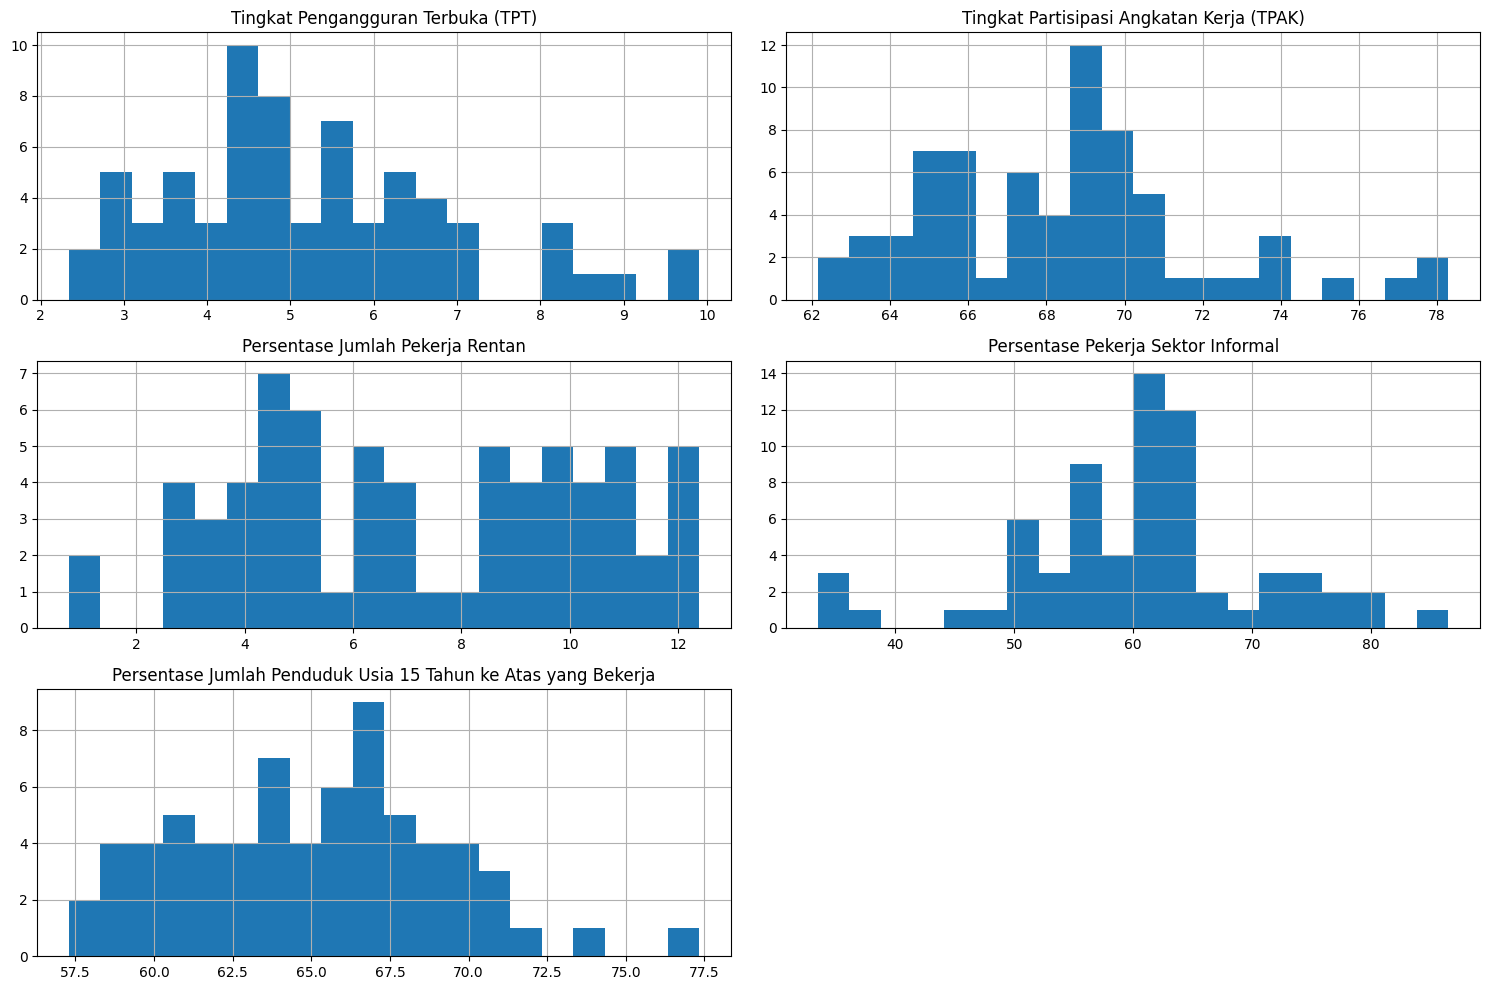

In [11]:
df.drop(columns=['Tahun']).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari visualisasi distribusi data untuk masing-masing indikator ketenagakerjaan yang ditampilkan dalam histogram:

1. Tingkat Pengangguran Terbuka (TPT)
Distribusi TPT terlihat tidak simetris dan cenderung menyebar secara luas dari sekitar 2,5% hingga hampir 10%. Sebagian besar provinsi memiliki TPT antara 4% hingga 6%, menunjukkan bahwa mayoritas wilayah memiliki tingkat pengangguran yang relatif sedang, meskipun terdapat beberapa provinsi dengan tingkat pengangguran yang sangat tinggi (outlier di atas 9%).

2. Tingkat Partisipasi Angkatan Kerja (TPAK)
Distribusi TPAK menunjukkan pola agak normal namun sedikit miring ke kanan (right-skewed). Nilai TPAK berkisar antara 62% hingga 78%, dengan konsentrasi tertinggi antara 67% hingga 70%. Ini menunjukkan bahwa sebagian besar provinsi memiliki partisipasi angkatan kerja yang tinggi.

3. Persentase Jumlah Pekerja Rentan
Distribusi pekerja rentan bersifat multimodal, artinya terdapat beberapa puncak dalam distribusinya. Nilai berkisar dari kurang dari 2% hingga lebih dari 12%, menunjukkan adanya ketimpangan yang besar antar provinsi dalam hal pekerja yang tergolong rentan. Hal ini mencerminkan heterogenitas dalam struktur ketenagakerjaan formal dan informal di berbagai wilayah.

4. Persentase Pekerja Sektor Informal
Distribusi ini tampak right-skewed dengan rentang nilai dari sekitar 35% hingga 86%. Puncak tertinggi berada pada rentang 56%–62%, menandakan mayoritas provinsi memiliki proporsi besar pekerja di sektor informal. Adanya provinsi dengan nilai ekstrem di atas 80% juga menunjukkan tantangan ketenagakerjaan informal di beberapa wilayah.

5. Persentase Penduduk Usia 15 Tahun ke Atas yang Bekerja
Distribusi data ini terlihat cukup simetris, dengan sebagian besar provinsi berada di rentang 60% hingga 70%. Nilai tertinggi mencapai sekitar 77%, dan nilai terendah sekitar 57%, menunjukkan bahwa mayoritas penduduk usia kerja di sebagian besar provinsi sudah terserap dalam dunia kerja, meskipun efisiensinya bervariasi.

Kesimpulan Sementara:
Distribusi data dari kelima indikator menunjukkan adanya keragaman karakteristik ketenagakerjaan antar provinsi, baik dalam hal partisipasi, formalitas pekerjaan, maupun pengangguran. Beberapa variabel memiliki distribusi miring atau multimodal, yang mengindikasikan potensi segmentasi wilayah yang kuat dan relevan untuk dilakukan klasterisasi seperti K-Means atau K-Medoids.

#Visualisasi Korelasi

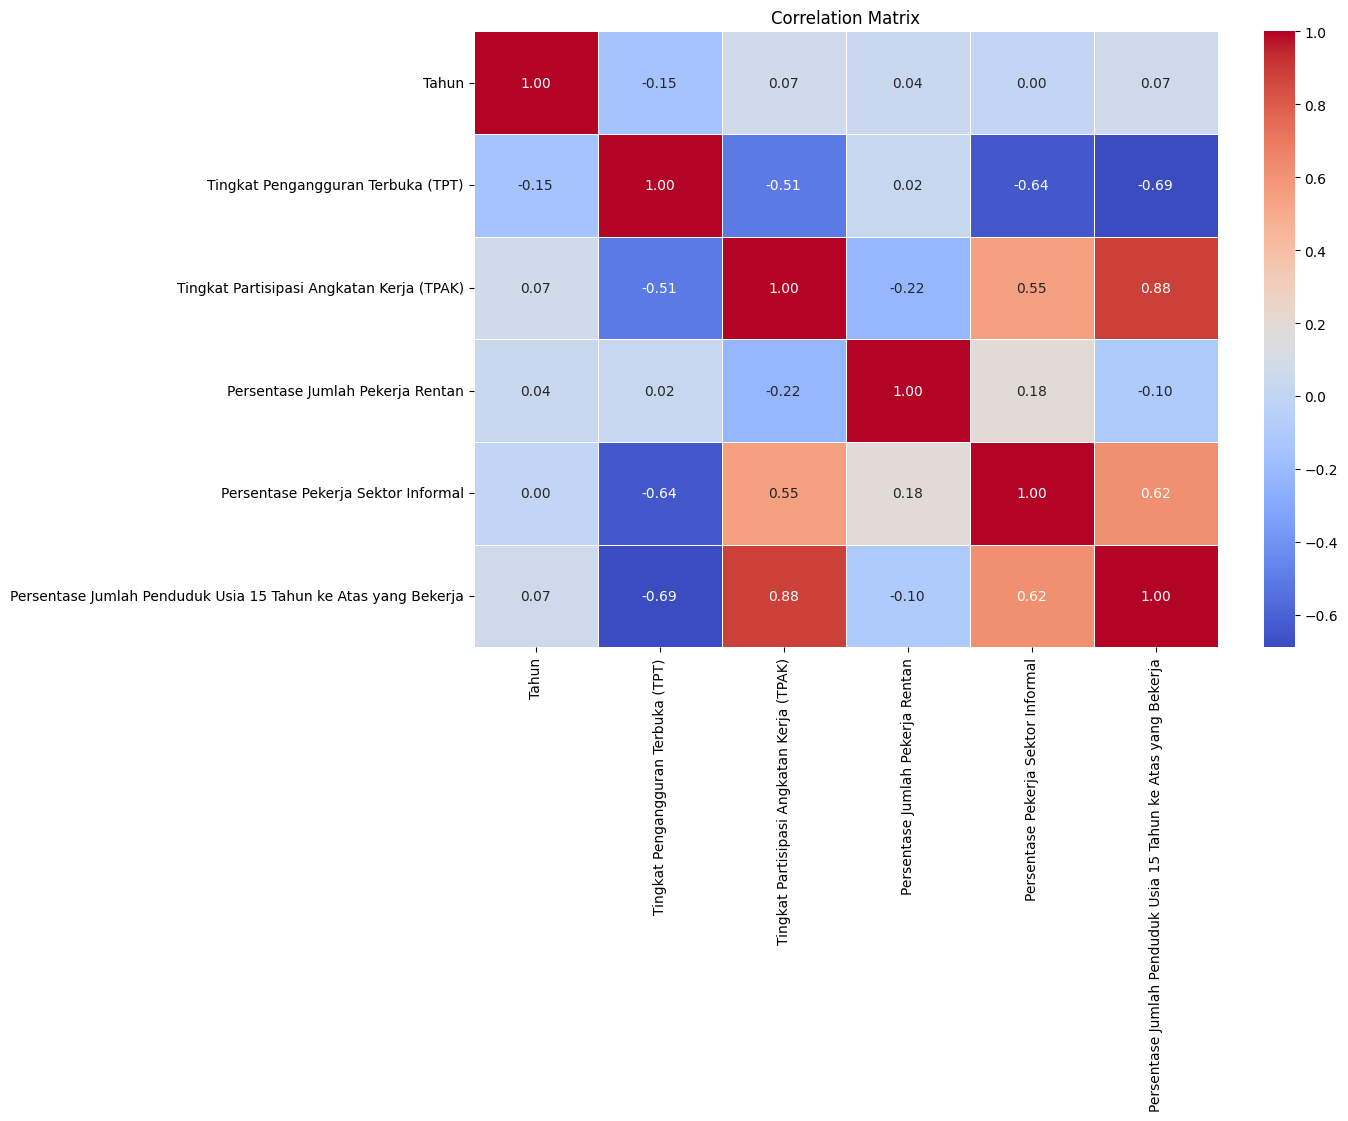

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik untuk korelasi
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi untuk kolom numerik
correlation_matrix = numerical_df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Korelasi tertinggi adalah korelasi Tingkat Partisipasi Angkatan Kerja (TPAK) dengan Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja yaitu sebesar 0.88 menunjukkan hubungan yang sangat kuat dan positif antara Tingkat Partisipasi Angkatan Kerja (TPAK) dengan Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja. Artinya Ketika tingkat partisipasi angkatan kerja meningkat, persentase jumlah penduduk usia 15 tahun ke atas yang bekerja juga cenderung meningkat. Artinya, semakin banyak orang yang berpartisipasi dalam angkatan kerja, semakin tinggi pula proporsi orang yang benar-benar bekerja dalam populasi usia produktif. Korelasi yang tinggi ini menunjukkan bahwa kedua variabel ini saling berkaitan erat.
Korelasi terendah adalah Persentase Jumlah Pekerja Rentan dengan Tingkat Penganguran Terbuka (TPT) yaitu 0.02. Korelasi sebesar 0.02 menunjukkan bahwa antara Persentase Jumlah Pekerja Rentan dan Tingkat Pengangguran Terbuka (TPT) hampir tidak ada hubungan atau sangat lemah. Artinya bahwa perubahan dalam persentase jumlah pekerja rentan hampir tidak berpengaruh pada perubahan tingkat pengangguran terbuka. Dengan kata lain, meskipun ada banyak pekerja rentan, hal ini tidak secara langsung mempengaruhi tingkat pengangguran terbuka. Ini bisa disebabkan oleh berbagai faktor, seperti pekerja rentan yang mungkin tidak terdaftar secara resmi dalam statistik pengangguran atau tidak mencakup seluruh dimensi ketenagakerjaan.

#BarPlot

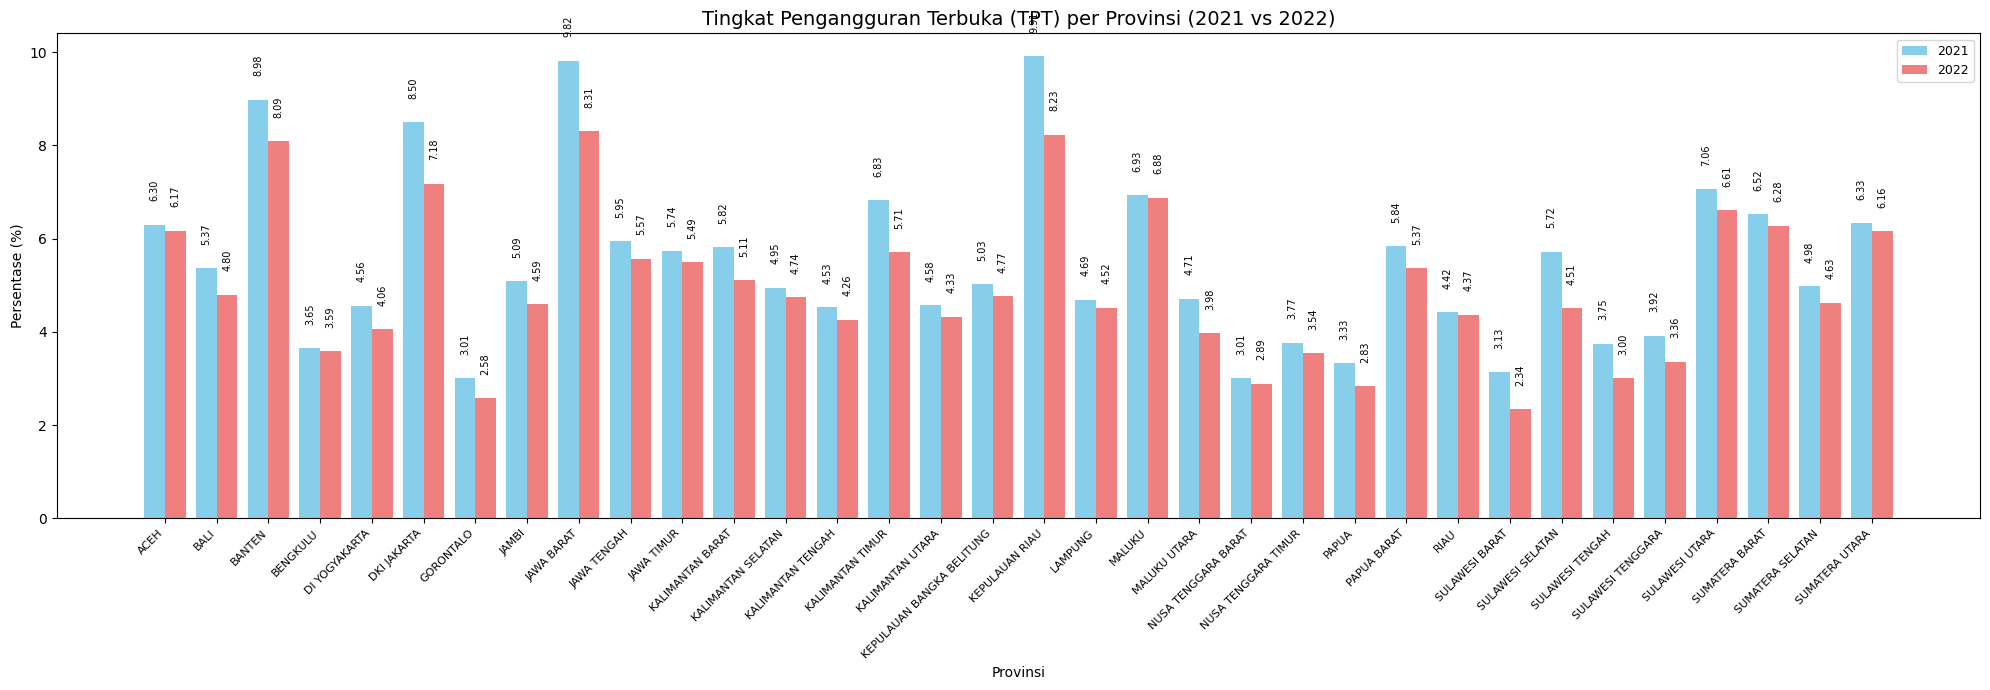

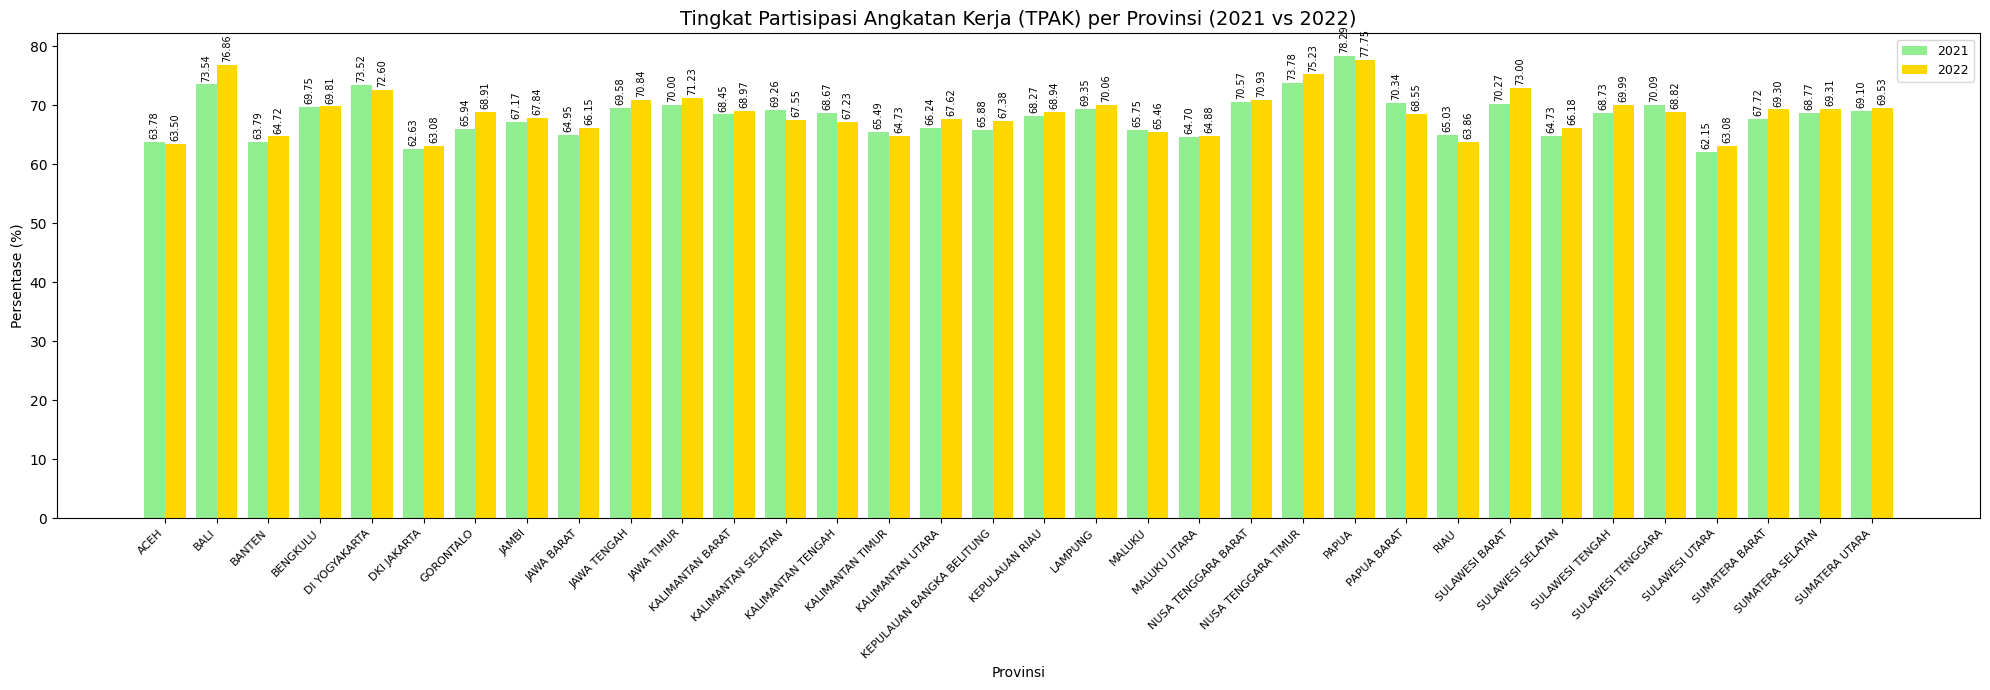

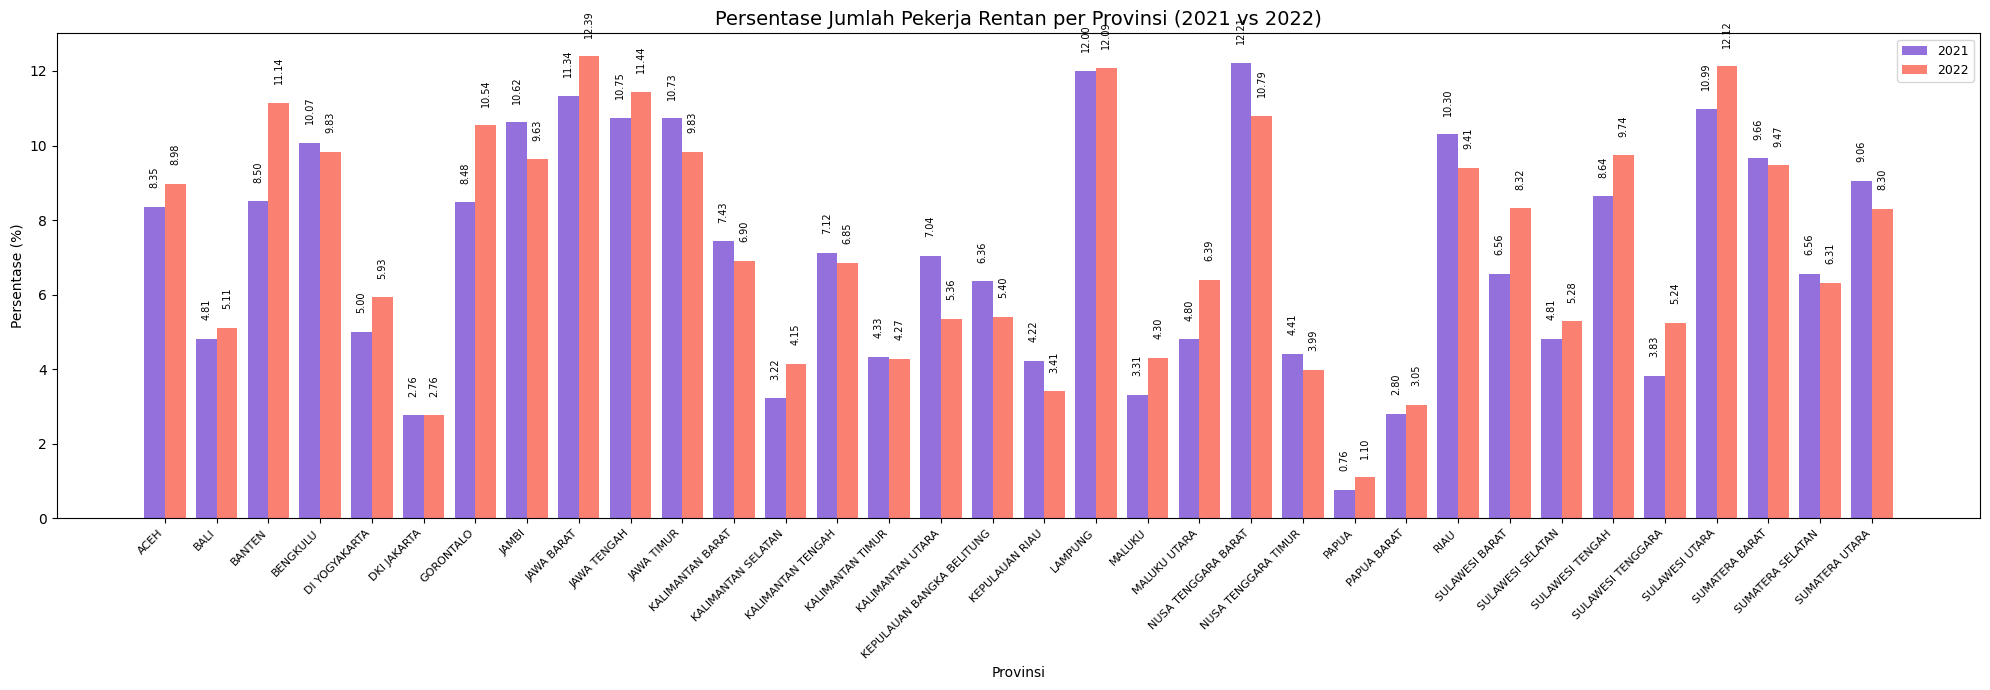

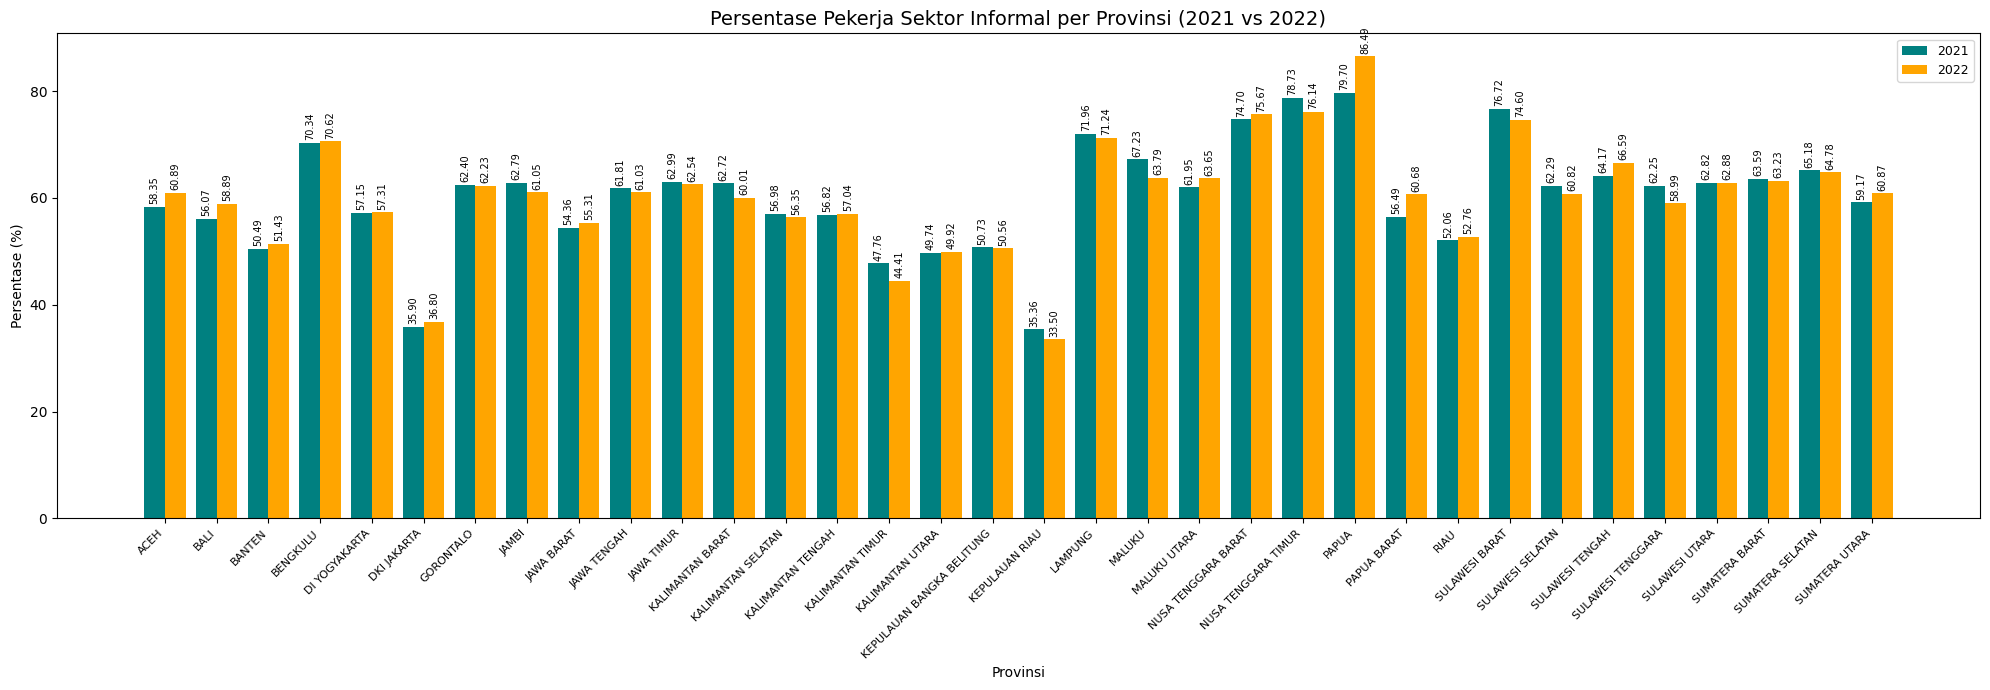

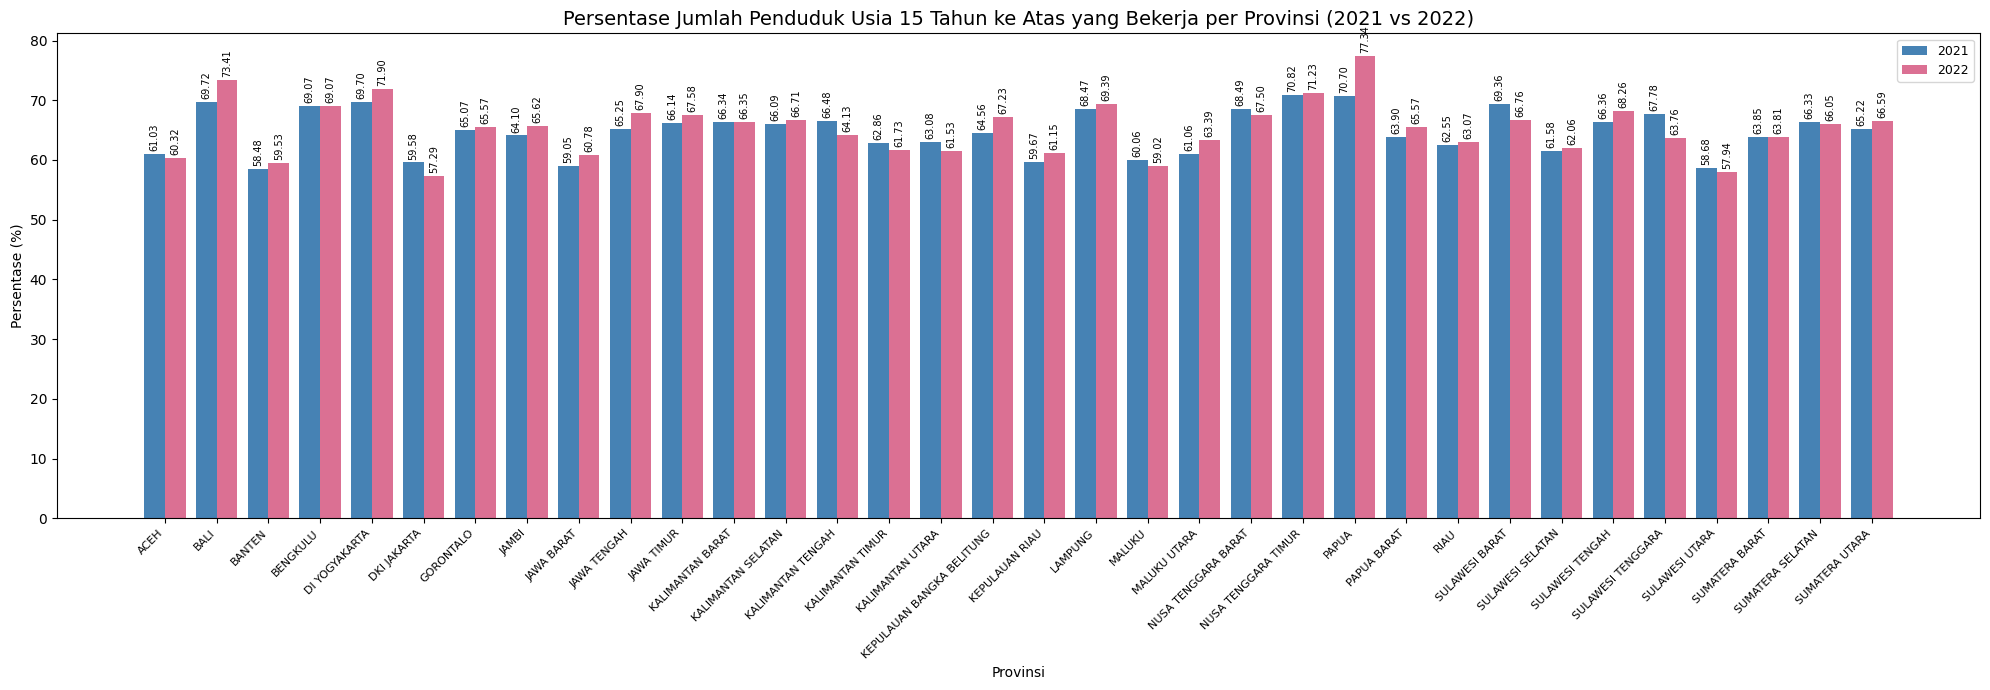

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Daftar variabel yang ingin divisualisasikan
variables = [
    'Tingkat Pengangguran Terbuka (TPT)',
    'Tingkat Partisipasi Angkatan Kerja (TPAK)',
    'Persentase Jumlah Pekerja Rentan',
    'Persentase Pekerja Sektor Informal',
    'Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja'
]

# Define distinct color pairs for each variable
color_pairs = [
    ('skyblue', 'lightcoral'), # For TPT
    ('lightgreen', 'gold'),     # For TPAK
    ('mediumpurple', 'salmon'),   # For Pekerja Rentan
    ('teal', 'orange'),         # For Pekerja Sektor Informal
    ('steelblue', 'palevioletred') # For Penduduk Bekerja
]

# Loop melalui setiap variabel dan buat plot terpisah
for i, var in enumerate(variables):
    # Cek jika kolom ada di DataFrame sebelum melakukan pivot
    if var not in df.columns:
        print(f"Kolom '{var}' tidak ditemukan di DataFrame. Melewati visualisasi ini.")
        continue

    # Pastikan kolom numerik untuk pivot
    if df[var].dtype not in ['float64', 'int64']:
         print(f"Kolom '{var}' bukan tipe numerik. Pastikan sudah diubah. Melewati visualisasi ini.")
         continue

    # Cek apakah tahun 2021 dan 2022 ada di data
    if 2021 not in df['Tahun'].unique() or 2022 not in df['Tahun'].unique():
         print(f"Data tahun 2021 atau 2022 tidak lengkap untuk kolom '{var}'. Melewati visualisasi ini.")
         continue

    pivot_df = df.pivot(index='Provinsi', columns='Tahun', values=var).sort_index()

    # Cek apakah pivot_df kosong atau tidak
    if pivot_df.empty:
         print(f"Data pivot kosong untuk kolom '{var}'. Melewati visualisasi ini.")
         continue

    x = range(len(pivot_df))
    bar_width = 0.4

    # Buat figur baru untuk setiap plot
    plt.figure(figsize=(20, 7)) # Atur ukuran figur di sini (lebar 20, tinggi 7)

    # Use distinct colors for each plot
    data_2021 = pivot_df[2021] if 2021 in pivot_df.columns else [0] * len(pivot_df) # Gunakan 0 jika tahun tidak ada
    data_2022 = pivot_df[2022] if 2022 in pivot_df.columns else [0] * len(pivot_df) # Gunakan 0 jika tahun tidak ada

    bars1 = plt.bar([j - bar_width/2 for j in x], data_2021, width=bar_width, label='2021', color=color_pairs[i][0])
    bars2 = plt.bar([j + bar_width/2 for j in x], data_2022, width=bar_width, label='2022', color=color_pairs[i][1])

    # Tambahkan label nilai vertikal agar tidak tumpang tindih
    for bar in bars1:
        if bar.get_height() > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=7, rotation=90)

    for bar in bars2:
        if bar.get_height() > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=7, rotation=90)

    plt.xticks(x, pivot_df.index, rotation=45, ha='right', fontsize=8)
    plt.title(f'{var} per Provinsi (2021 vs 2022)', fontsize=14) # Judul plot
    plt.ylabel('Persentase (%)', fontsize=10)
    plt.xlabel('Provinsi', fontsize=10) # Tambahkan label sumbu X
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show() # Tampilkan figur saat ini sebelum loop berlanjut


### Tingkat Pengangguran Terbuka (TPT) per Provinsi (2021 vs 2022)**

* **Sebagian besar provinsi menunjukkan penurunan TPT di tahun 2022 dibandingkan 2021**, yang merupakan sinyal **pemulihan ekonomi pasca pandemi**.
* **Provinsi seperti DKI Jakarta, Banten, dan Jawa Barat** cenderung memiliki **TPT yang tinggi**, mungkin karena urbanisasi tinggi dan ketatnya persaingan kerja.
* Beberapa provinsi dengan **TPT rendah**, seperti Gorontalo, Papua, dan Sulawesi Barat bisa menunjukkan **dominasi sektor informal atau pariwisata** yang cepat pulih atau akses yang sulit di daerah tersebut.
* **Kesenjangan antar provinsi** masih tampak signifikan — ada yang di atas 8%, ada pula yang di bawah 3%.

---

### **Tingkat Partisipasi Angkatan Kerja (TPAK) per Provinsi (2021 vs 2022)**

* **Mayoritas provinsi mengalami kenaikan TPAK pada 2022**, artinya semakin banyak penduduk usia kerja yang ikut aktif di pasar kerja.
* **TPAK di atas 70%** di beberapa daerah (contoh: Kalimantan, Sulawesi) bisa menandakan **tingginya keterlibatan tenaga kerja informal atau sektor pertambangan/perkebunan**.
* **TPAK yang lebih rendah** (misal di DKI atau DI Yogyakarta) bisa disebabkan oleh **tingginya proporsi pelajar atau mahasiswa**, atau **urban underemployment**.

---

### **Persentase Jumlah Pekerja Rentan per Provinsi (2021 vs 2022)**

* **Beberapa provinsi menunjukkan penurunan jumlah pekerja rentan**, yang bisa menjadi sinyal perbaikan kualitas pekerjaan.
* Namun, masih banyak provinsi (terutama di luar Jawa) dengan angka **pekerja rentan > 50%**, menandakan bahwa **sebagian besar tenaga kerja tidak memiliki perlindungan kerja yang layak**.
* **Pekerja rentan tinggi = dominasi sektor informal dan pertanian**, seperti di Papua, NTT, NTB.
* Perubahan antar tahun cenderung kecil di sebagian besar provinsi, menunjukkan **stabilitas tapi juga stagnansi**.

---

### **Persentase Pekerja Sektor Informal per Provinsi (2021 vs 2022)**

* **Banyak provinsi memiliki persentase pekerja sektor informal di atas 60%**, menandakan bahwa **mayoritas penduduk bekerja di luar hubungan kerja formal** (misalnya sebagai petani, pedagang kecil, pekerja lepas).

* **Provinsi di kawasan timur Indonesia (seperti Papua, NTT, NTB, Maluku)** dan sebagian di Kalimantan cenderung memiliki **angka sektor informal yang sangat tinggi** — ini mencerminkan **struktur ekonomi yang masih sangat tradisional dan agraris**.

* **Provinsi besar seperti DKI Jakarta, Jawa Barat, dan Banten** menunjukkan **angka sektor informal yang lebih rendah**, walaupun tetap signifikan. Ini bisa mengindikasikan **lebih besarnya peluang kerja formal**, namun juga bisa berarti banyak pekerjaan informal di sektor urban (seperti ojek online atau pedagang kaki lima) tetap tidak terdata sebagai informal.

* **Perubahan antara 2021 dan 2022 tidak terlalu besar di sebagian besar provinsi**, namun ada kecenderungan **sedikit penurunan** di beberapa wilayah. Ini bisa menjadi sinyal positif dari **perluasan sektor formal** (misalnya karena pemulihan ekonomi pasca pandemi atau program jaminan sosial).

---

### **Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja per Provinsi (2021 vs 2022)**

1. **Mayoritas provinsi menunjukkan peningkatan proporsi penduduk usia kerja (15+) yang bekerja pada tahun 2022 dibandingkan 2021.**
   Ini mengindikasikan adanya **pemulihan ekonomi** pasca pandemi dan **peningkatan serapan tenaga kerja**.

2. **Provinsi dengan tingkat partisipasi kerja tinggi (di atas 70%)** antara lain:

   * **Papua Barat (2022: 77.34%)**
   * **DKI Jakarta (2022: 73.41%)**
   * **Papua (2022: 72.3%)**
   * **Banten dan Kalimantan Selatan** juga mendekati 70%

   Ini menunjukkan **aktivitas ekonomi yang padat** di wilayah tersebut, meskipun jenis pekerjaan bisa sangat bervariasi.

3. **Provinsi dengan angka terendah (sekitar 59–61%)** termasuk:

   * **Maluku (2022: 59.02%)**
   * **Bengkulu (2022: 59.53%)**
   * **Gorontalo (2022: 57.29%)**
   * Ini bisa menandakan **kurangnya kesempatan kerja** atau **banyaknya penduduk usia kerja yang tidak aktif secara ekonomi**, misalnya karena pendidikan, pengangguran, atau pekerjaan domestik yang tidak masuk perhitungan statistik.

4. **Beberapa provinsi seperti Jawa Barat dan Jawa Timur stabil**, menunjukkan **keseimbangan tenaga kerja** dalam dua tahun terakhir.


#**Pra Pemrosesan**

1. Cek Miss Value

In [14]:
# Menampilkan persentase missing values per kolom
missing_values = df.isnull().mean() * 100
print(missing_values)

Tahun                                                            0.0
Provinsi                                                         0.0
Tingkat Pengangguran Terbuka (TPT)                               0.0
Tingkat Partisipasi Angkatan Kerja (TPAK)                        0.0
Persentase Jumlah Pekerja Rentan                                 0.0
Persentase Pekerja Sektor Informal                               0.0
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja    0.0
dtype: float64


Berdasarkan output, tidak terdapat missing value pada semua data.

2. Cek Outlier

In [15]:
# Pilih kolom numerik saja
numerik = df.select_dtypes(include='number')

# Cek outlier berdasarkan IQR
for col in numerik.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outlier)} outlier")


Tahun: 0 outlier
Tingkat Pengangguran Terbuka (TPT): 2 outlier
Tingkat Partisipasi Angkatan Kerja (TPAK): 3 outlier
Persentase Jumlah Pekerja Rentan: 0 outlier
Persentase Pekerja Sektor Informal: 11 outlier
Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja: 1 outlier


Berdasarkan output, terdapat 2 outlier pada variabel Tingkat Pengangguran Terbuka (TPT), 3 outlier pada variabel Tingkat Partisipasi Angkatan Kerja (TPAK), 11 outlier pada variabel Persentase Pekerja Sektor Informal, dan terdapat 1 outlier pada variabel Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja.

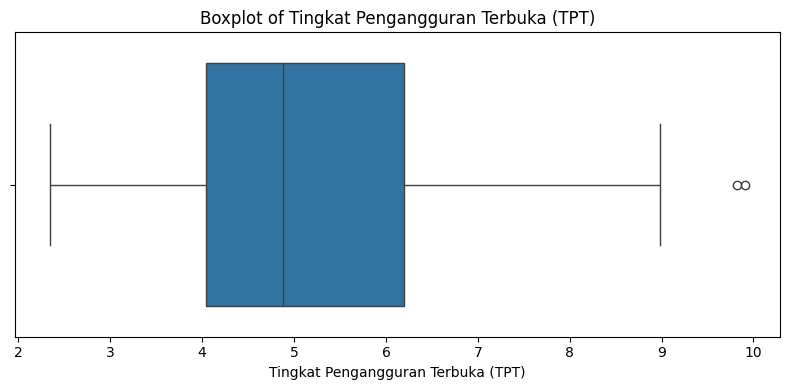

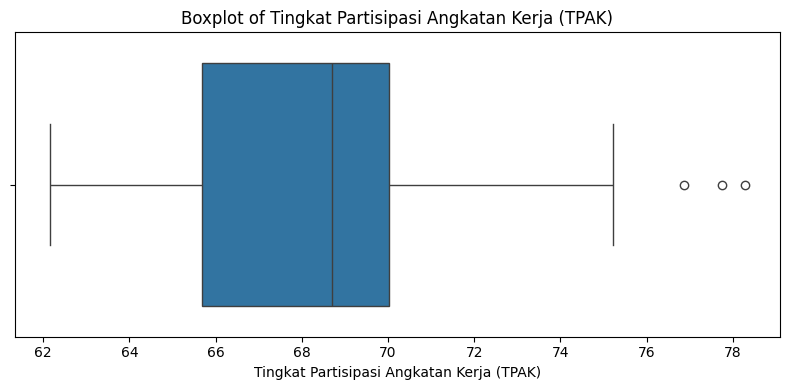

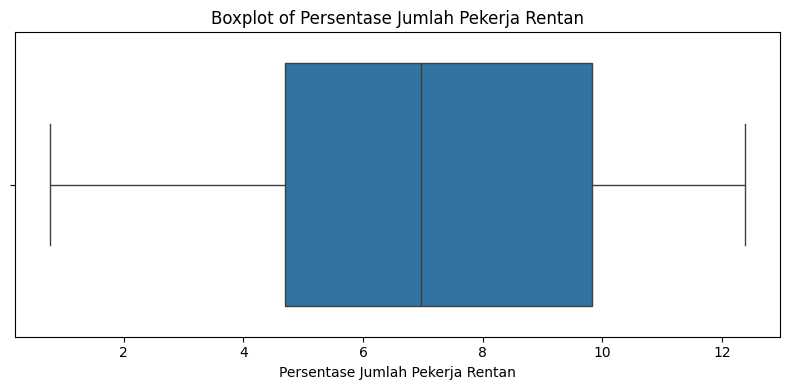

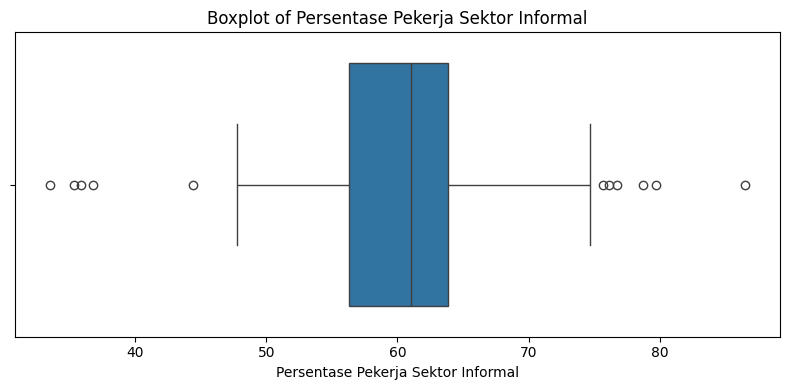

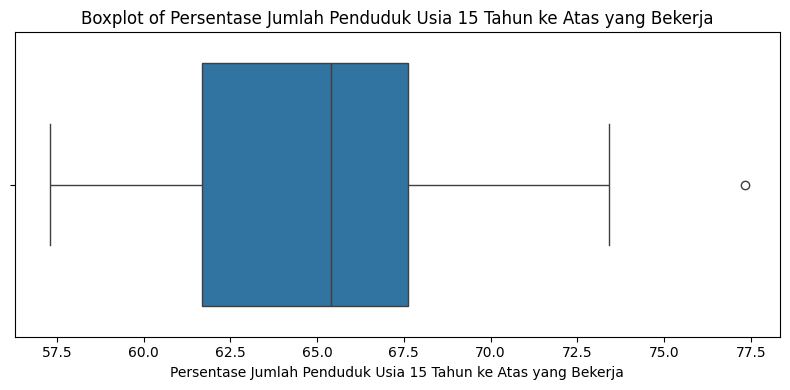

In [16]:
# Bersihkan nama kolom (hapus spasi ekstra dan newline)
df.columns = df.columns.str.strip()

# Pilih semua kolom numerik, lalu drop kolom 'tahun' jika ada
df_numerik = df.select_dtypes(include='number')
if 'Tahun' in df_numerik.columns:
    df_numerik = df_numerik.drop(columns=['Tahun'])

# Buat boxplot satu per satu
for col in df_numerik.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Berdasarkan output Boxplot di atas, boxplot pertama menunjukkan Tingkat Pengangguran Terbuka (TPT) dengan median sekitar 5 dan rentang data antara 4 hingga 7, namun terdapat beberapa outliers pada nilai yang lebih tinggi, mengindikasikan adanya daerah dengan tingkat pengangguran yang sangat tinggi. Boxplot kedua, yang menunjukkan Tingkat Partisipasi Angkatan Kerja (TPAK), memiliki median sekitar 69 dengan rentang data antara 68 hingga 72, menunjukkan distribusi yang cukup sempit dan stabil meskipun ada beberapa outliers. Boxplot ketiga menggambarkan Persentase Jumlah Pekerja Rentan, dengan distribusi yang lebih tersebar dan beberapa outliers, yang mencerminkan variasi yang besar dalam kondisi pekerjaan yang tidak stabil.

Boxplot terakhir,  Secara keseluruhan, boxplot-boxplot ini menggambarkan variasi yang ada dalam data ketenagakerjaan, dengan beberapa variabel menunjukkan kestabilan, sementara yang lainnya memiliki variasi yang lebih besar dan keberadaan outliers.

3. cek duplikat

In [17]:
# Jumlah baris duplikat (seluruh kolom sama persis)
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


Berdasarkan output, diperoleh bahwa tidak ada yang duplikat pada seluruh variabel data.

In [18]:
df.head()

,Tahun,Provinsi,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
0,2021,ACEH,6.30,63.78,8.35,58.35,61.03
1,2021,SUMATERA UTARA,6.33,69.10,9.06,59.17,65.22
2,2021,SUMATERA BARAT,6.52,67.72,9.66,63.59,63.85
3,2021,RIAU,4.42,65.03,10.30,52.06,62.55
4,2021,JAMBI,5.09,67.17,10.62,62.79,64.10


Output di atas, menunjukkan data yang sudah siap di analisis lebih lanjut sehingga akan dilakukan pemodelan clustering.

# Modeling

Modelling akan dilakukan dengan menggunakan metode K-Means dan K-Medoids dan dipadukan dengan PCA. Untuk memilih nilai K (Jumlah gerombol terbaik) maka digunakan metode elbow. Nantinya metode yang memiliki performa terbaik akan dipilih.

In [19]:
!pip install scikit-learn-extra==0.3.0 kneed==0.8.5

In [20]:
# 1. Turunkan NumPy ke versi yang kompatibel
!pip install numpy==1.23.5 scikit-learn==1.1.3 scikit-learn-extra==0.3.0 --force-reinstall

# 2. Setelah ini selesai, WAJIB restart runtime

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scikit_learn-1.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.0 MB)
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kneed import KneeLocator

sns.set(style='whitegrid')

In [22]:
features = ['Tingkat Pengangguran Terbuka (TPT)',
            'Tingkat Partisipasi Angkatan Kerja (TPAK)',
            'Persentase Pekerja Sektor Informal',
            'Persentase Jumlah Pekerja Rentan',
            'Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja']

X_raw = df[features]

# Pemilihan K Terbaik

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f8e98808180>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

Jumlah klaster optimal: 3


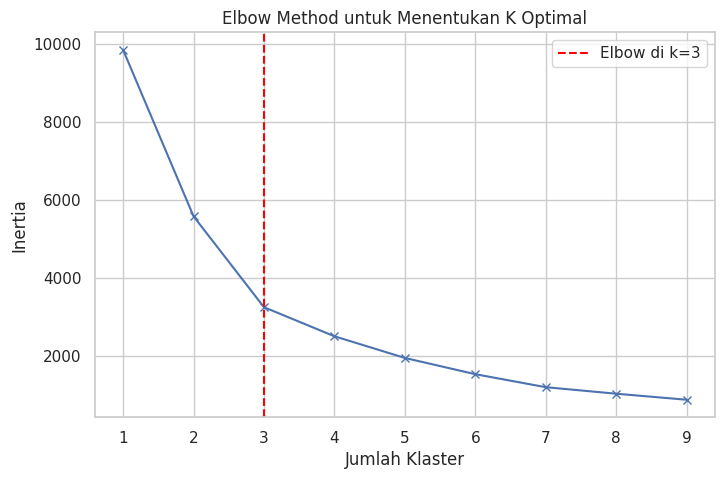

In [23]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_raw)
    inertia.append(kmeans.inertia_)

# Cari elbow
kl = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(f"Jumlah klaster optimal: {optimal_k}")

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bx-')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Elbow di k={optimal_k}')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.legend()
plt.show()

Dapat dilihat bahwa nilai K terbaiknya adalah 3 yang berarti bahwa jumlah gerombol/klaster terbaik sebanyak 3.

# Clustering dengan PCA

PCA dilakukan untuk mereduksi data, pada penelitian kali ini data akan direduksi menjadi 3 komponen saja

In [24]:
# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_raw)

# KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

# KMedoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, method='pam')
labels_kmedoids = kmedoids.fit_predict(X_pca)

# Evaluasi Model

In [25]:
def evaluate_clustering(X, labels, method):
    print(f"=== Evaluasi {method} ===")
    print(f"Silhouette Score     : {silhouette_score(X, labels):.4f}")
    print(f"Davies-Bouldin Index : {davies_bouldin_score(X, labels):.4f}")
    print(f"Calinski-Harabasz    : {calinski_harabasz_score(X, labels):.4f}\n")

evaluate_clustering(X_pca, labels_kmeans, "KMeans")
evaluate_clustering(X_pca, labels_kmedoids, "KMedoids")

=== Evaluasi KMeans ===
Silhouette Score     : 0.4528
Davies-Bouldin Index : 0.7953
Calinski-Harabasz    : 70.2857

=== Evaluasi KMedoids ===
Silhouette Score     : 0.4517
Davies-Bouldin Index : 0.8082
Calinski-Harabasz    : 69.6163



Berdasarkan hasil evaluasinya dapat dilihat bahwa metode yang terbaik dilihat dari keseluruhan metrik evaluasi adalah K-Medoids.

# Karakteristik Tiap Daerah Berdasarkan Algoritma Clustering Terbaik

In [26]:
# Pilih label dari metode terbaik
df_clustered = df.copy()
df_clustered['Cluster'] = labels_kmedoids

In [27]:
import pandas as pd

# Fungsi untuk menampilkan anggota klaster
def tampilkan_anggota_klaster(df_clustered):
    for tahun in [2021, 2022]:
        print(f"\n=== Daftar Anggota Klaster Tahun {tahun} ===")
        tahun_data = df_clustered[df_clustered['Tahun'] == tahun]

        # Urutkan berdasarkan klaster
        klaster_terurut = tahun_data.sort_values('Cluster')

        # Tampilkan per klaster
        for klaster in sorted(klaster_terurut['Cluster'].unique()):
            anggota = klaster_terurut[klaster_terurut['Cluster'] == klaster]['Provinsi'].tolist()
            print(f"\nKlaster {klaster} ({len(anggota)} provinsi):")
            print(", ".join(anggota))

# Panggil fungsi
tampilkan_anggota_klaster(df_clustered)

# Alternatif dalam bentuk DataFrame
print("\n\n=== Tabel Ringkasan ===")
tabel_klaster = df_clustered.pivot_table(index='Cluster',
                                       columns='Tahun',
                                       values='Provinsi',
                                       aggfunc=lambda x: ', '.join(x),
                                       fill_value='-')
display(tabel_klaster)


=== Daftar Anggota Klaster Tahun 2021 ===

Klaster 0 (6 provinsi):
PAPUA, SULAWESI BARAT, BENGKULU, LAMPUNG, NUSA TENGGARA TIMUR, NUSA TENGGARA BARAT

Klaster 1 (20 provinsi):
MALUKU UTARA, MALUKU, GORONTALO, SULAWESI TENGGARA, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI UTARA, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN BARAT, ACEH, BALI, JAWA TIMUR, DI YOGYAKARTA, JAWA TENGAH, SUMATERA UTARA, SUMATERA BARAT, JAMBI, PAPUA BARAT, SUMATERA SELATAN

Klaster 2 (8 provinsi):
RIAU, BANTEN, DKI JAKARTA, KALIMANTAN UTARA, KALIMANTAN TIMUR, JAWA BARAT, KEPULAUAN BANGKA BELITUNG, KEPULAUAN RIAU

=== Daftar Anggota Klaster Tahun 2022 ===

Klaster 0 (6 provinsi):
PAPUA, SULAWESI BARAT, BENGKULU, LAMPUNG, NUSA TENGGARA TIMUR, NUSA TENGGARA BARAT

Klaster 1 (20 provinsi):
MALUKU UTARA, MALUKU, GORONTALO, SULAWESI TENGGARA, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI UTARA, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN BARAT, ACEH, BALI, JAWA TIMUR, DI YOGYAKARTA, JAWA TENGAH, SUMATERA UT

Tahun,2021,2022
Cluster,,
0,"BENGKULU, LAMPUNG, NUSA TENGGARA BARAT, NUSA T...","BENGKULU, LAMPUNG, NUSA TENGGARA BARAT, NUSA T..."
1,"ACEH, SUMATERA UTARA, SUMATERA BARAT, JAMBI, S...","ACEH, SUMATERA UTARA, SUMATERA BARAT, JAMBI, S..."
2,"RIAU, KEPULAUAN BANGKA BELITUNG, KEPULAUAN RIA...","RIAU, KEPULAUAN BANGKA BELITUNG, KEPULAUAN RIA..."


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variabel sesuai output Anda
variabel_analisis = [
    'Tingkat Pengangguran Terbuka (TPT)',
    'Tingkat Partisipasi Angkatan Kerja (TPAK)',
    'Persentase Jumlah Pekerja Rentan',
    'Persentase Pekerja Sektor Informal',
    'Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja'
]

# 1. Fungsi untuk analisis karakteristik klaster
def analisis_klaster(df_clustered, tahun):
    print(f"\n=== ANALISIS KARAKTERISTIK KLASTER TAHUN {tahun} ===")
    tahun_data = df_clustered[df_clustered['Tahun'] == tahun]

    # Statistik deskriptif
    stats = tahun_data.groupby('Cluster')[variabel_analisis].describe().transpose()
    print("\nStatistik Deskriptif per Klaster:")
    display(stats)

    # Rata-rata per klaster
    mean_stats = tahun_data.groupby('Cluster')[variabel_analisis].mean().round(2)
    print("\nRata-rata Karakteristik per Klaster:")
    display(mean_stats)

    return tahun_data

# 2. Analisis untuk kedua tahun
print("==============================================")
df_2021 = analisis_klaster(df_clustered, 2021)
print("\n" + "="*50)
df_2022 = analisis_klaster(df_clustered, 2022)


=== ANALISIS KARAKTERISTIK KLASTER TAHUN 2021 ===

Statistik Deskriptif per Klaster:


Cluster                                                           0  \
Tingkat Pengangguran Terbuka (TPT)                 count   6.000000   
                                                   mean    3.596667   
                                                   std     0.610137   
                                                   min     3.010000   
                                                   25%     3.180000   
                                                   50%     3.490000   
                                                   75%     3.740000   
                                                   max     4.690000   
Tingkat Partisipasi Angkatan Kerja (TPAK)          count   6.000000   
                                                   mean   72.001667   
                                                   std     3.459921   
                                                   min    69.350000   
                                                   25%    69.880000   
                                                   50%    70.420000   
                                                   75%    72.977500   
                                                   max    78.290000   
Persentase Jumlah Pekerja Rentan                   count   6.000000   
                                                   mean    7.668333   
                                                   std     4.576643   
                                                   min     0.760000   
                                                   25%     4.947500   
                                                   50%     8.315000   
                                                   75%    11.517500   
                                                   max    12.210000   
Persentase Pekerja Sektor Informal                 count   6.000000   
                                                   mean   75.358333   
                                                   std     3.721239   
                                                   min    70.340000   
                                                   25%    72.645000   
                                                   50%    75.710000   
                                                   75%    78.227500   
                                                   max    79.700000   
Persentase Jumlah Penduduk Usia 15 Tahun ke Ata... count   6.000000   
                                                   mean   69.485000   
                                                   std     1.045615   
                                                   min    68.470000   
                                                   25%    68.635000   
                                                   50%    69.215000   
                                                   75%    70.365000   
                                                   max    70.820000   

Cluster                                                           1          2  
Tingkat Pengangguran Terbuka (TPT)                 count  20.000000   8.000000  
                                                   mean    5.354000   7.258750  
                                                   std     1.073937   2.344534  
                                                   min     3.010000   4.420000  
                                                   25%     4.672500   4.917500  
                                                   50%     5.545000   7.665000  
                                                   75%     6.037500   9.190000  
                                                   max     7.060000   9.910000  
Tingkat Partisipasi Angkatan Kerja (TPAK)          count  20.000000   8.000000  
                                                   mean   68.099500  65.285000  
                                                   std     2.951949   1.676714  
                                                   min    62.150000  62.630000  
                                   


Rata-rata Karakteristik per Klaster:


,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
Cluster,,,,,
0,3.60,72.00,7.67,75.36,69.48
1,5.35,68.10,7.05,61.16,64.74
2,7.26,65.28,6.86,47.05,61.23




=== ANALISIS KARAKTERISTIK KLASTER TAHUN 2022 ===

Statistik Deskriptif per Klaster:


Cluster                                                           0  \
Tingkat Pengangguran Terbuka (TPT)                 count   6.000000   
                                                   mean    3.285000   
                                                   std     0.766727   
                                                   min     2.340000   
                                                   25%     2.845000   
                                                   50%     3.215000   
                                                   75%     3.577500   
                                                   max     4.520000   
Tingkat Partisipasi Angkatan Kerja (TPAK)          count   6.000000   
                                                   mean   72.796667   
                                                   std     3.174647   
                                                   min    69.810000   
                                                   25%    70.277500   
                                                   50%    71.965000   
                                                   75%    74.672500   
                                                   max    77.750000   
Persentase Jumlah Pekerja Rentan                   count   6.000000   
                                                   mean    7.686667   
                                                   std     4.267658   
                                                   min     1.100000   
                                                   25%     5.072500   
                                                   50%     9.075000   
                                                   75%    10.550000   
                                                   max    12.090000   
Persentase Pekerja Sektor Informal                 count   6.000000   
                                                   mean   75.793333   
                                                   std     5.717943   
                                                   min    70.620000   
                                                   25%    72.080000   
                                                   50%    75.135000   
                                                   75%    76.022500   
                                                   max    86.490000   
Persentase Jumlah Penduduk Usia 15 Tahun ke Ata... count   6.000000   
                                                   mean   70.215000   
                                                   std     3.823500   
                                                   min    66.760000   
                                                   25%    67.892500   
                                                   50%    69.230000   
                                                   75%    70.770000   
                                                   max    77.340000   

Cluster                                                           1          2  
Tingkat Pengangguran Terbuka (TPT)                 count  20.000000   8.000000  
                                                   mean    4.907500   6.373750  
                                                   std     1.185273   1.772600  
                                                   min     2.580000   4.330000  
                                                   25%     4.210000   4.670000  
                                                   50%     4.770000   6.445000  
                                                   75%     5.717500   8.125000  
                                                   max     6.880000   8.310000  
Tingkat Partisipasi Angkatan Kerja (TPAK)          count  20.000000   8.000000  
                                                   mean   68.531500  65.810000  
                                                   std     3.160072   2.044624  
                                                   min    63.080000  63.080000  
                                   


Rata-rata Karakteristik per Klaster:


,Tingkat Pengangguran Terbuka (TPT),Tingkat Partisipasi Angkatan Kerja (TPAK),Persentase Jumlah Pekerja Rentan,Persentase Pekerja Sektor Informal,Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja
Cluster,,,,,
0,3.28,72.80,7.69,75.79,70.22
1,4.91,68.53,7.48,61.18,65.30
2,6.37,65.81,6.77,46.84,61.54


**Berdasarkan output, diperoleh 3 klaster yaitu:**

**Klaster 0: "Provinsi Ketenagakerjaan Unggul" (6 Provinsi)**
Kelompok provinsi ini menunjukkan kondisi pasar kerja yang sangat kuat. Provinsi-provinsi dalam klaster ini memiliki tingkat pengangguran yang paling rendah dan partisipasi angkatan kerja yang tinggi. Mereka juga memiliki proporsi pekerja rentan dan informal yang minim. Selain itu, penduduk usia produktif di provinsi ini cenderung aktif bekerja, menjadikannya sebagai benchmark ideal dalam sektor ketenagakerjaan di Indonesia.

**Klaster 1: "Provinsi Ketenagakerjaan Moderat" (20 Provinsi)**
Klaster ini merepresentasikan kondisi ketenagakerjaan yang lebih seimbang atau rata-rata di Indonesia. Provinsi-provinsi di klaster ini memiliki indikator yang berada di tengah spektrum, dengan kekuatan dan tantangan yang seimbang. Meskipun berada di posisi moderat, kelompok ini memiliki potensi besar untuk berkembang lebih lanjut dengan adanya kebijakan dan perbaikan yang tepat.

**Klaster 2: "Provinsi Prioritas Intervensi Ketenagakerjaan" (8 Provinsi)**
Kelompok provinsi ini menghadapi tantangan ketenagakerjaan yang cukup serius. Mereka memiliki tingkat pengangguran yang tinggi, partisipasi angkatan kerja yang rendah, serta dominasi pekerja rentan dan sektor informal. Selain itu, proporsi penduduk usia produktif yang aktif bekerja juga sangat rendah. Oleh karena itu, provinsi dalam klaster ini membutuhkan perhatian dan intervensi kebijakan yang lebih intensif untuk mengatasi masalah ketenagakerjaan yang mereka hadapi.

In [29]:
df_clustered.to_csv("hasil_clustering_dengan_label.csv", index=False)

# Visualisasi

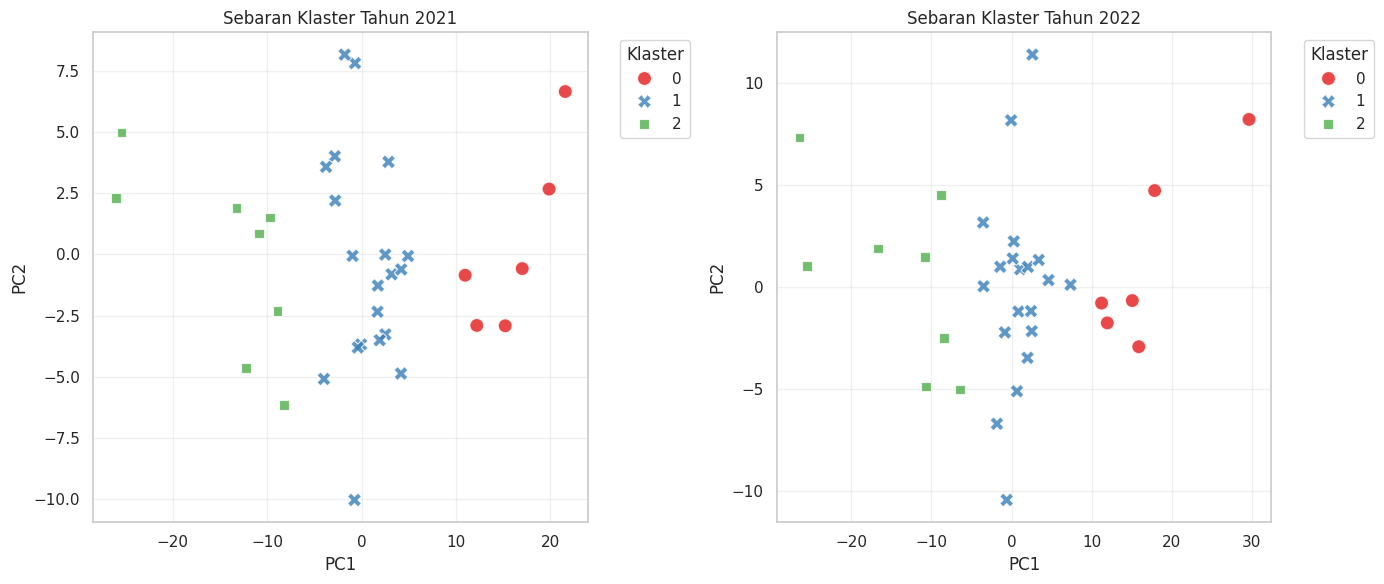

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot untuk Tahun 2021
plt.subplot(1, 2, 1)
mask_2021 = (df['Tahun'] == 2021)
sns.scatterplot(x=X_pca[mask_2021, 0], y=X_pca[mask_2021, 1],
                hue=labels_kmedoids[mask_2021],
                palette='Set1',
                style=labels_kmedoids[mask_2021],
                s=100,
                alpha=0.8)
plt.title('Sebaran Klaster Tahun 2021')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)

# Plot untuk Tahun 2022
plt.subplot(1, 2, 2)
mask_2022 = (df['Tahun'] == 2022)
sns.scatterplot(x=X_pca[mask_2022, 0], y=X_pca[mask_2022, 1],
                hue=labels_kmedoids[mask_2022],
                palette='Set1',
                style=labels_kmedoids[mask_2022],
                s=100,
                alpha=0.8)
plt.title('Sebaran Klaster Tahun 2022')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Output di atas menunjukkan bahwa keanggotaan klaster setiap provinsi tetap stabil dari tahun 2021 ke 2022. Artinya, provinsi yang berada di Klaster Unggul pada tahun 2021 akan tetap berada di Klaster Unggul pada tahun 2022, begitu juga dengan klaster-klaster lainnya. Ini menunjukkan bahwa posisi masing-masing provinsi relatif konsisten dari tahun ke tahun.

In [31]:
!pip install geopandas folium

import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [32]:
url_geojson = "https://raw.githubusercontent.com/ans-4175/peta-indonesia-geojson/master/indonesia-prov.geojson"
geo = gpd.read_file(url_geojson)

In [33]:
import folium
import geopandas as gpd
import branca.colormap as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from branca.element import Template, MacroElement

# Pastikan nama provinsi UPPERCASE di kedua dataframe
df_clustered['Provinsi'] = df_clustered['Provinsi'].str.upper()
geo['Propinsi'] = geo['Propinsi'].str.upper()

# Buat fungsi untuk buat peta berdasarkan tahun
def buat_peta_klaster(tahun, df_clustered, geo, filename):

    # Filter berdasarkan tahun
    df_tahun = df_clustered[df_clustered['Tahun'] == tahun]

    # Gabung shapefile dengan data klaster
    geo_merged = geo.merge(df_tahun, left_on='Propinsi', right_on='Provinsi')

    # Hitung jumlah klaster
    cluster_count = geo_merged['Cluster'].nunique()

    # Buat colormap
    cool_cmap = plt.get_cmap('cool')
    colors = [mcolors.to_hex(cool_cmap(i)) for i in np.linspace(0, 1, cluster_count)]

    color_scale = cm.StepColormap(
        colors=colors,
        vmin=0,
        vmax=cluster_count - 1,
        index=list(range(cluster_count)),
        caption='Klaster Provinsi'
    )

    # Peta dasar
    m = folium.Map(location=[-2.5, 117], zoom_start=5)

    # Tambahkan layer polygon
    for _, row in geo_merged.iterrows():
        folium.GeoJson(
            row['geometry'],
            style_function=lambda feature, cluster=row['Cluster']: {
                'fillColor': color_scale(cluster),
                'color': 'black',
                'weight': 0.5,
                'fillOpacity': 0.7
            },
            tooltip=folium.Tooltip(f"{row['Provinsi']} - Klaster {row['Cluster']}")
        ).add_to(m)

    # Tambahkan marker ikon pink bintang
    for _, r in geo_merged.iterrows():
        centroid = r['geometry'].centroid
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=folium.Icon(color='lightpink', icon='star', prefix='fa'),
            popup=f"{r['Provinsi']} - Klaster {r['Cluster']}"
        ).add_to(m)

    # Tambahkan colormap
    color_scale.add_to(m)

    # Legenda custom pink soft
    legend_html = f"""
    {{% macro html(this, kwargs) %}}
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 200px;
        background-color: #fff5f9;
        border:1px solid #f3d1dc;
        z-index:9999;
        font-size:12px;
        padding: 8px 10px;
        border-radius: 6px;
        box-shadow: 1px 1px 5px rgba(0,0,0,0.1);
        ">
        <b style="font-size:13px;">Legenda Klaster {tahun}</b><br>
        {''.join([f'''
            <div style="display:flex; align-items:center; margin-bottom:4px;">
                <div style="
                    background:{colors[i]};
                    width:12px;
                    height:12px;
                    border-radius:3px;
                    margin-right:6px;
                    opacity:0.8;
                    border: 1px solid #f8d5e3;">
                </div>
                Klaster {i}
            </div>''' for i in range(cluster_count)])}
    </div>
    {{% endmacro %}}
    """
    macro = MacroElement()
    macro._template = Template(legend_html)
    m.get_root().add_child(macro)

    # Simpan peta ke file HTML
    m.save(filename)
    return m

# === Panggil fungsi untuk dua tahun ===
peta_2021 = buat_peta_klaster(2021, df_clustered, geo, "peta_klaster_2021.html")
peta_2022 = buat_peta_klaster(2022, df_clustered, geo, "peta_klaster_2022.html")

# Tampilkan salah satu di notebook
peta_2021

In [34]:
peta_2022

In [35]:
# Simpan hasil GeoDataFrame sebagai GeoJSON
geo.to_file("hasil_klaster.geojson", driver="GeoJSON")

# Explained Variance PCA

In [36]:
pca = PCA(n_components=3)
pca.fit(X_raw)
print(pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

[0.80773105 0.12330766 0.04884055]
Total explained variance: 0.9798792621623121


- Komponen pertama menjelaskan sekitar 88.77% dari total variansi.
- Komponen kedua menjelaskan sekitar 12.33% dari total variansi.
- Komponen ketiga menjelaskan sekitar 4.80% dari total variansi.

Nilai 0.9798792621623121 menunjukkan total variansi yang dijelaskan oleh ketiga komponen utama sekitar 97.91% dari total variansi dalam data. Nilai tersebut cukup tinggi yang memperlihatkan bahwa 3 komponen sudah cukup representatif untuk data.

# Kontribusi Tiap Variabel pada Hasil Clustering dengan PCA

In [37]:
import numpy as np
from sklearn.decomposition import PCA

# # Misalnya, X_raw adalah data yang sudah dipersiapkan
# pca = PCA(n_components=3)
# pca.fit(X_raw)

# # Menampilkan varians yang dijelaskan oleh masing-masing komponen utama
# print("Explained Variance:", pca.explained_variance_ratio_)
# print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Menampilkan kontribusi setiap variabel terhadap komponen utama
print("\nKontribusi Tiap Variabel pada Setiap Komponen:")
for i, component in enumerate(pca.components_):
    print(f"Komponen {i+1}:")
    for j, var in enumerate(component):
        print(f"  Variabel {j+1}: {var:.4f}")



Kontribusi Tiap Variabel pada Setiap Komponen:
Komponen 1:
  Variabel 1: -0.1076
  Variabel 2: 0.2096
  Variabel 3: 0.9333
  Variabel 4: 0.0422
  Variabel 5: 0.2678
Komponen 2:
  Variabel 1: -0.0966
  Variabel 2: 0.5808
  Variabel 3: -0.2924
  Variabel 4: -0.4588
  Variabel 5: 0.5978
Komponen 3:
  Variabel 1: 0.0320
  Variabel 2: -0.1889
  Variabel 3: 0.1976
  Variabel 4: -0.8790
  Variabel 5: -0.3894


Komponen 1:

Komponen 1 sangat didominasi oleh Variabel 3 (dengan bobot 0.9333). Ini berarti Variabel 3 adalah variabel yang paling berpengaruh atau berkorelasi kuat (positif) dengan Komponen 1. Variabel 2 juga memiliki kontribusi negatif yang cukup signifikan (-0.2896), sedangkan variabel lainnya memiliki kontribusi yang lebih kecil.

Komponen 2:

Komponen 2 sangat dipengaruhi oleh Variabel 1 (dengan bobot -0.8066) dan Variabel 5 (dengan bobot 0.5978) serta Variabel 2 (dengan bobot 0.5808). Ini menunjukkan bahwa Komponen 2 mewakili kontras antara Variabel 1 (berkorelasi negatif) dengan Variabel 2 dan Variabel 5 (berkorelasi positif).

Komponen 3:

Komponen 3 paling kuat dipengaruhi oleh Variabel 4 (dengan bobot -0.8790). Ini menunjukkan Variabel 4 berkorelasi negatif kuat dengan Komponen 3. Variabel 5 juga memiliki kontribusi negatif yang cukup besar, dan Variabel 1 memiliki kontribusi positif yang lumayan.

Keterangan:

Variabel 1 --> Tingkat Pengangguran Terbuka (TPT)

Variabel 2 --> Tingkat Partisipasi Angkatan Kerja (TPAK)

Variabel 3 --> Persentase Jumlah Pekerja Rentan

Variabel 4 --> Persentase Jumlah Pekerja Sektor Informal

Variabel 5 --> Persentase Jumlah Penduduk Usia 15 Tahun ke Atas yang Bekerja